# ANALYTIC PLAN

1. OVERALL CASCADE RECEIVED HVL RESULT > RECEIVED EAC > COMPLETED EAC BY DISTRICT (4 x 4) [done]
2. FEMALE VS MALES
3. BY AGE GROUP

## QUESTIONS:
1. WHAT PROPORTION OF CLIENTS ARE NOT RECEIVING 1ST EAC OVER A 12 MONTH PERIOD? - DISTRICT, FACILITY 
2. ARE THERE DIFFERENCES BETWEEN MEN AND WOMEN?
3  ARE THERE DIFFERENCES ACROSS AGE-GROUPS?
4. 2ND VL SPECIMEN COLLECTION, DIFFERENCES BY AGE SEX - DISTRICT, FACILITY


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### FUNCTIONS

In [2]:
def highVL(df):
    """returns a dataFrame for highVL"""
    df = df.iloc[:,[2, 4] + [i for i in range(5, 21)]]
    return df

def firstEAC(df):
    """returns a dataFrame for firstEAC"""
    df = df.iloc[:,[2, 4] + [i for i in range(21, 37)]]
    return df

def completedEAC(df):
    """returns a dataFrame for completed EAC"""
    df = df.iloc[:,[2, 4] + [i for i in range(37, 53)]]
    return df

def females(df):
    """returns a dataFrame with females"""
    df = df.iloc[:, [0, 1]+[i for i in range(2, 18, 2)]]
    return df

def males(df):
    """returns a dataFrame with males"""
    df = df.iloc[:, [0, 1]+[i for i in range(3, 19, 2)]]
    return df

def rowTotals(df):
    """returns a dataframe with a row total column"""
    
    x_columns = df.columns[2:]
    if "Total" in df.columns:        
        return df
    df.loc[:, "Total"] = df[x_columns].sum(axis = 1)
    return df

def cascadeTotals(df):
    """returns cascade totals for each df"""
    hVL = highVL(df)
    eAC = firstEAC(df)
    compEAC = completedEAC(df)
    
    totalHVL = sum(rowTotals(hVL)["Total"])
    totalEAC = sum(rowTotals(eAC)["Total"])
    totalCompEAC = sum(rowTotals(compEAC)["Total"])
    
    return totalHVL, totalEAC, totalCompEAC

def columnTotals(*args):
    """returns a list with the total for column Total by district"""
    totals = []
    district = []
    for arg in args:
        totals.append(sum(arg.Total))
        district+=arg.orgunitlevel3.unique()
    return district, totals

def annotate(ax, arg):
    '''This function allows annotation of the bars in the bar chart'''
    for item in range(len(arg)):
        height = arg[item]
        ax.annotate('{}'.format(height), fontsize = 12, xy = (item, height), xytext = (0,3),
                    textcoords = 'offset points', ha = 'center', va= 'bottom')
        
def percText(arg, ax):
    """annotates percentages to the cascade. Argument can be a dataframe or a list/tuple"""  
    if type(arg) == pd.core.frame.DataFrame:
        p1 = cascadeTotals(arg)[0]//3
        p2 = cascadeTotals(arg)[1]//3
        
        ax.text(0.3, p1,"{}".format(round(cascadeTotals(arg)[1]/cascadeTotals(arg)[0], 2)), fontsize = 14, color = 'green',
            bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
        ax.text(1.3, p2,"{}".format(round(cascadeTotals(arg)[2]/cascadeTotals(arg)[1], 2)), fontsize = 14, color = 'green',
            bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})    
    else:
        p1 = arg[0]//3
        p2 = arg[1]//3
    
        ax.text(0.3, p1,"{}".format(round(arg[1]/arg[0], 2)), fontsize = 14, color = 'green',
            bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
        ax.text(1.3, p2,"{}".format(round(arg[2]/arg[1], 2)), fontsize = 14, color = 'green',
            bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
        
def maleFemaleDistrict(arg):
    """this function allows for comparison of cascade for males and females. 
    The arg can be a DataFrame, List or Tuple"""
    
    highVLm = sum(rowTotals(males(highVL(arg)))["Total"])
    highVLfm = sum(rowTotals(females(highVL(arg)))["Total"])
    firstEACm = sum(rowTotals(males(firstEAC(arg)))["Total"])
    firstEACfm = sum(rowTotals(females(firstEAC(arg)))["Total"])
    compEACm = sum(rowTotals(males(completedEAC(arg)))["Total"])
    compEACfm = sum(rowTotals(females(completedEAC(arg)))["Total"])

    cascadeMen = (highVLm, firstEACm, compEACm)
    cascadeFem = (highVLfm, firstEACfm, compEACfm)
    return cascadeMen, cascadeFem

def renameColumns(arg, **kwargs):
    """A function to rename columns in dataFrame"""
    
    newColumns = {}

    for i in range(len(arg.columns)):
        if "2021" in arg.columns[i]:
            ageSex = arg.columns[i].split()[-2:]
            for k, v in kwargs.items():
                if k in arg.columns[i]:        
                    renamed = v +" "+ ageSex[0] + ageSex[1]
                    newColumns[arg.columns[i]] = renamed
    return newColumns

def ageTotals(gender, variable, dataFrame):
    """Sums the totals of the ages """
    container = []
    for i in range(len(gender(variable(dataFrame)).sum(axis=0))):
        if type(gender(variable(dataFrame)).sum(axis=0)[i]) == np.float64:
            container.append(gender(variable(dataFrame)).sum(axis=0)[i])
    return container

def ageSexGraph(arg):

    firstEACFem = ageTotals(females, firstEAC, arg) #create lists of the individual indicators
    HVLFem = ageTotals(females, highVL, arg)
    completedEACFem = ageTotals(females, completedEAC, arg)

    xx_age = ['15-19Female','20-24Female','25-29Female','30-34Female','35-39Female','40-44Female','45-49Female','50+Female']

    #males
    firstEACMen = ageTotals(males, firstEAC, arg) # create lists of the individual indicators
    HVLMen = ageTotals(males, highVL, arg)
    completedEACMen = ageTotals(males, completedEAC, arg)

    xy_age = ['15-19Male','20-24Male','25-29Male','30-34Male','35-39Male','40-44Male','45-49Male','50+Male']

    x = np.arange(len(xx_age)) #create numeric x-ticks, these will be replaced by the xy and xx_age lists 
    width = 0.25

    x = np.arange(len(xy_age))
    width = 0.25

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
    ax[0].bar(x-0.25, height = HVLFem, width=width)
    ax[0].bar(x, height = firstEACFem, width=width)
    ax[0].bar(x+0.25, height=completedEACFem, width=width)

    ax[0].set_xticks(x)
    ax[0].set_xticklabels(xx_age)

    lisst2 = []
    for i in range(len(HVLFem)):
        lisst2.append((HVLFem[i], firstEACFem[i], completedEACFem[i]))

    for i in range(len(lisst2)):    #not really sure how the distance calculation works :)
        ax[0].text(0.095*(i*10), lisst2[i][0]//3,"{}".format(round(lisst2[i][1]/lisst2[i][0], 2)), fontsize = 14, color = 'green',
                    bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
        ax[0].text(0.1*(i*10), lisst2[i][1]//6,"{}".format(round(lisst2[i][2]/lisst2[i][1], 2)), fontsize = 14, color = 'green',
                    bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})



    ax[1].bar(x-0.25, height = HVLMen, width=width)
    ax[1].bar(x, height = firstEACMen, width=width)
    ax[1].bar(x+0.25, height=completedEACMen, width=width)

    ax[1].set_xticks(x)
    ax[1].set_xticklabels(xy_age)

    lisst = []
    for i in range(len(HVLMen)):
        lisst.append((HVLMen[i], firstEACMen[i], completedEACMen[i]))

    for i in range(len(lisst)):    
        ax[1].text(0.095*(i*10), lisst[i][0]//3,"{}".format(round(lisst[i][1]/lisst[i][0], 2)), fontsize = 14, color = 'green',
                    bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
        ax[1].text(0.1*(i*10), lisst[i][1]//6,"{}".format(round(lisst[i][2]/lisst[i][1], 2)), fontsize = 14, color = 'green',
                    bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})

    plt.show()

In [3]:
df = pd.read_excel("EAC Cascade.xls")
df.columns = df.iloc[1]
df = df.drop([0, 1])
df = df.fillna(0)

renamed = renameColumns(df, D16 = "HVL", D17 = "First_EAC", D18 = "Completed_EAC")
# convert object dtypes to float
df_num = df.iloc[:, [i for i in range(5, 53)]].astype("float")
df = df.iloc[:, [i for i in range(5)]].join(df_num)
df.rename(columns = renamed, inplace = True)

### District Specific DataFrames

In [4]:
# DISTRICT SPECIFIC DATA FRAMES
district = df.groupby("orgunitlevel3")

bulawayo = district.get_group("Bulawayo")
chitungwiza = district.get_group("Chitungwiza")
beitbridge = district.get_group("Beitbridge")
bulilima = district.get_group("Bulilima")
gwanda = district.get_group("Gwanda")
insiza = district.get_group("Insiza")
mangwe = district.get_group("Mangwe")
matobo = district.get_group("Matobo")
umzingwane = district.get_group("Umzingwane")
chiredzi = district.get_group("Chiredzi")
chivi = district.get_group("Chivi")
gutu = district.get_group("Gutu")
masvingo = district.get_group("Masvingo")
mwenezi = district.get_group("Mwenezi")
zaka = district.get_group("Zaka")

districts = [
    bulawayo, chitungwiza, beitbridge, bulilima, gwanda, insiza, 
    mangwe, matobo, umzingwane, chiredzi, chivi, gutu, masvingo,
    mwenezi, zaka
]


In [5]:
districtHVL = {}
for i in districts:
    districtHVL[i.orgunitlevel3.unique()[0]] = highVL(i)
    
districtFirstEAC = {}
for i in districts:
    districtFirstEAC[i.orgunitlevel3.unique()[0]] = firstEAC(i)
    
districtCompEAC = {}
for i in districts:
    districtCompEAC[i.orgunitlevel3.unique()[0]] = completedEAC(i)

### ANALYSIS

C:\Users\tbepe\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


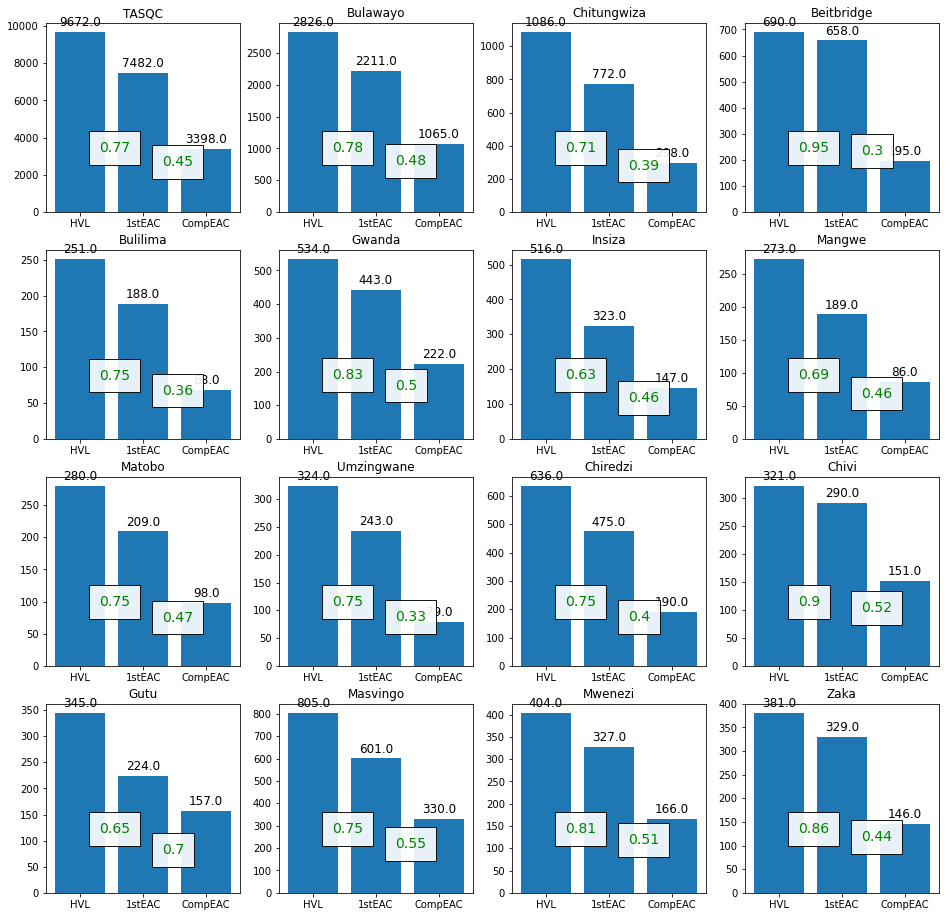

In [6]:
fig, axs = plt.subplots(nrows = 4, ncols=4, figsize = (12,12))

axs[0,0].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(df))
axs[0,1].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(bulawayo))
axs[0,2].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(chitungwiza))
axs[0,3].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(beitbridge))
axs[1,0].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(bulilima))
axs[1,1].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(gwanda))
axs[1,2].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(insiza))
axs[1,3].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(mangwe))
axs[2,0].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(matobo))
axs[2,1].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(umzingwane))
axs[2,2].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(chiredzi))
axs[2,3].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(chivi))
axs[3,0].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(gutu))
axs[3,1].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(masvingo))
axs[3,2].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(mwenezi))
axs[3,3].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadeTotals(zaka))

annotate(axs[0, 0], cascadeTotals(df))
annotate(axs[0, 1], cascadeTotals(bulawayo))
annotate(axs[0, 2], cascadeTotals(chitungwiza))
annotate(axs[0, 3], cascadeTotals(beitbridge))
annotate(axs[1, 0], cascadeTotals(bulilima))
annotate(axs[1, 1], cascadeTotals(gwanda))
annotate(axs[1, 2], cascadeTotals(insiza))
annotate(axs[1, 3], cascadeTotals(mangwe))
annotate(axs[2, 0], cascadeTotals(matobo))
annotate(axs[2, 1], cascadeTotals(umzingwane))
annotate(axs[2, 2], cascadeTotals(chiredzi))
annotate(axs[2, 3], cascadeTotals(chivi))
annotate(axs[3, 0], cascadeTotals(gutu))
annotate(axs[3, 1], cascadeTotals(masvingo))
annotate(axs[3, 2], cascadeTotals(mwenezi))
annotate(axs[3, 3], cascadeTotals(zaka))

percText(df, axs[0,0])
percText(bulawayo, axs[0,1])
percText(chitungwiza, axs[0,2])
percText(beitbridge, axs[0,3])
percText(bulilima, axs[1,0])
percText(gwanda, axs[1,1])
percText(insiza, axs[1,2])
percText(mangwe, axs[1,3])
percText(matobo, axs[2,0])
percText(umzingwane, axs[2,1])
percText(chiredzi, axs[2,2])
percText(chivi, axs[2,3])
percText(gutu, axs[3,0])
percText(masvingo, axs[3,1])
percText(mwenezi, axs[3,2])
percText(zaka, axs[3,3])

axs[0,0].set_title("TASQC")
axs[0,1].set_title("Bulawayo")        
axs[0,2].set_title("Chitungwiza")
axs[0,3].set_title("Beitbridge")
axs[1,0].set_title("Bulilima")
axs[1,1].set_title("Gwanda")        
axs[1,2].set_title("Insiza")
axs[1,3].set_title("Mangwe")         
axs[2,0].set_title("Matobo")
axs[2,1].set_title("Umzingwane")        
axs[2,2].set_title("Chiredzi")
axs[2,3].set_title("Chivi")         
axs[3,0].set_title("Gutu")
axs[3,1].set_title("Masvingo")        
axs[3,2].set_title("Mwenezi")
axs[3,3].set_title("Zaka")                
         
width = 16
height = 16
fig.set_size_inches(width, height)
plt.show()

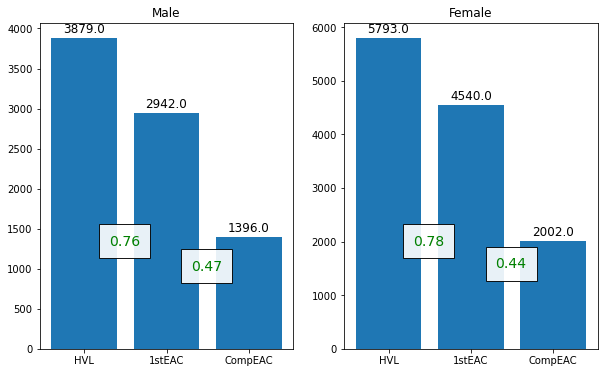

In [7]:
cascadesMF = maleFemaleDistrict(df)

fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(10, 6))

axs[0].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadesMF[0])
axs[1].bar(x = ["HVL", "1stEAC", "CompEAC"], height = cascadesMF[1])

annotate(axs[0], cascadesMF[0])
annotate(axs[1], cascadesMF[1])

percText(cascadesMF[0], axs[0])
percText(cascadesMF[1], axs[1])

axs[0].set_title("Male")
axs[1].set_title("Female") 
plt.show()

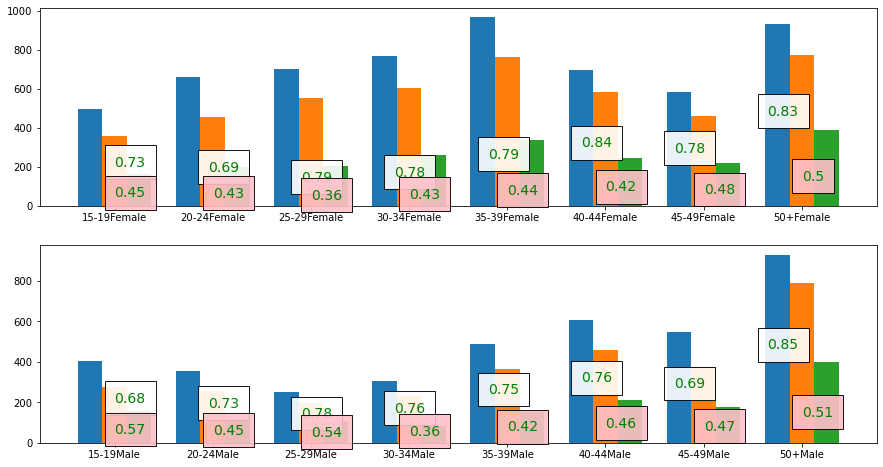

In [45]:
#females
firstEACFem = ageTotals(females, firstEAC, df) #create lists of the individual indicators
HVLFem = ageTotals(females, highVL, df)
completedEACFem = ageTotals(females, completedEAC, df)

xx_age = ['15-19Female','20-24Female','25-29Female','30-34Female','35-39Female','40-44Female','45-49Female','50+Female']

#males
firstEACMen = ageTotals(males, firstEAC, df) # create lists of the individual indicators
HVLMen = ageTotals(males, highVL, df)
completedEACMen = ageTotals(males, completedEAC, df)

xy_age = ['15-19Male','20-24Male','25-29Male','30-34Male','35-39Male','40-44Male','45-49Male','50+Male']

x = np.arange(len(xx_age)) #create numeric x-ticks, these will be replaced by the xy and xx_age lists 
width = 0.25

x = np.arange(len(xy_age))
width = 0.25

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
ax[0].bar(x-0.25, height = HVLFem, width=width)
ax[0].bar(x, height = firstEACFem, width=width)
ax[0].bar(x+0.25, height=completedEACFem, width=width)

ax[0].set_xticks(x)
ax[0].set_xticklabels(xx_age)

lisst2 = []
for i in range(len(HVLFem)):
    lisst2.append((HVLFem[i], firstEACFem[i], completedEACFem[i]))

for i in range(len(lisst2)):    #not really sure how the distance calculation works :)
    ax[0].text(0.095*(i*10), lisst[i][0]//2,"{}".format(round(lisst2[i][1]/lisst2[i][0], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
    ax[0].text(0.1*(i*10), lisst[i][1]//6,"{}".format(round(lisst2[i][2]/lisst2[i][1], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})
    


ax[1].bar(x-0.25, height = HVLMen, width=width)
ax[1].bar(x, height = firstEACMen, width=width)
ax[1].bar(x+0.25, height=completedEACMen, width=width)

ax[1].set_xticks(x)
ax[1].set_xticklabels(xy_age)

lisst = []
for i in range(len(HVLMen)):
    lisst.append((HVLMen[i], firstEACMen[i], completedEACMen[i]))

for i in range(len(lisst)):    
    ax[1].text(0.095*(i*10), lisst[i][0]//2,"{}".format(round(lisst[i][1]/lisst[i][0], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
    ax[1].text(0.1*(i*10), lisst[i][1]//6,"{}".format(round(lisst[i][2]/lisst[i][1], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})

plt.show()

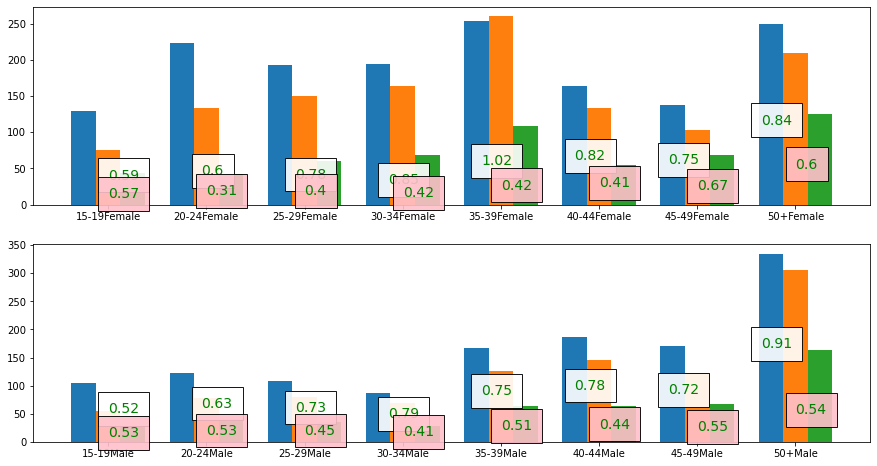

In [48]:
firstEACFem = ageTotals(females, firstEAC, bulawayo) #create lists of the individual indicators
HVLFem = ageTotals(females, highVL, bulawayo)
completedEACFem = ageTotals(females, completedEAC, bulawayo)

xx_age = ['15-19Female','20-24Female','25-29Female','30-34Female','35-39Female','40-44Female','45-49Female','50+Female']

#males
firstEACMen = ageTotals(males, firstEAC, bulawayo) # create lists of the individual indicators
HVLMen = ageTotals(males, highVL, bulawayo)
completedEACMen = ageTotals(males, completedEAC, bulawayo)

xy_age = ['15-19Male','20-24Male','25-29Male','30-34Male','35-39Male','40-44Male','45-49Male','50+Male']

x = np.arange(len(xx_age)) #create numeric x-ticks, these will be replaced by the xy and xx_age lists 
width = 0.25

x = np.arange(len(xy_age))
width = 0.25

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
ax[0].bar(x-0.25, height = HVLFem, width=width)
ax[0].bar(x, height = firstEACFem, width=width)
ax[0].bar(x+0.25, height=completedEACFem, width=width)

ax[0].set_xticks(x)
ax[0].set_xticklabels(xx_age)

lisst2 = []
for i in range(len(HVLFem)):
    lisst2.append((HVLFem[i], firstEACFem[i], completedEACFem[i]))

for i in range(len(lisst2)):    #not really sure how the distance calculation works :)
    ax[0].text(0.095*(i*10), lisst2[i][0]//3,"{}".format(round(lisst2[i][1]/lisst2[i][0], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
    ax[0].text(0.1*(i*10), lisst2[i][1]//6,"{}".format(round(lisst2[i][2]/lisst2[i][1], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})
    


ax[1].bar(x-0.25, height = HVLMen, width=width)
ax[1].bar(x, height = firstEACMen, width=width)
ax[1].bar(x+0.25, height=completedEACMen, width=width)

ax[1].set_xticks(x)
ax[1].set_xticklabels(xy_age)

lisst = []
for i in range(len(HVLMen)):
    lisst.append((HVLMen[i], firstEACMen[i], completedEACMen[i]))

for i in range(len(lisst)):    
    ax[1].text(0.095*(i*10), lisst[i][0]//2,"{}".format(round(lisst[i][1]/lisst[i][0], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10})
    ax[1].text(0.1*(i*10), lisst[i][1]//6,"{}".format(round(lisst[i][2]/lisst[i][1], 2)), fontsize = 14, color = 'green',
                bbox={'facecolor': 'pink', 'alpha': 0.9, 'pad': 10})

plt.show()

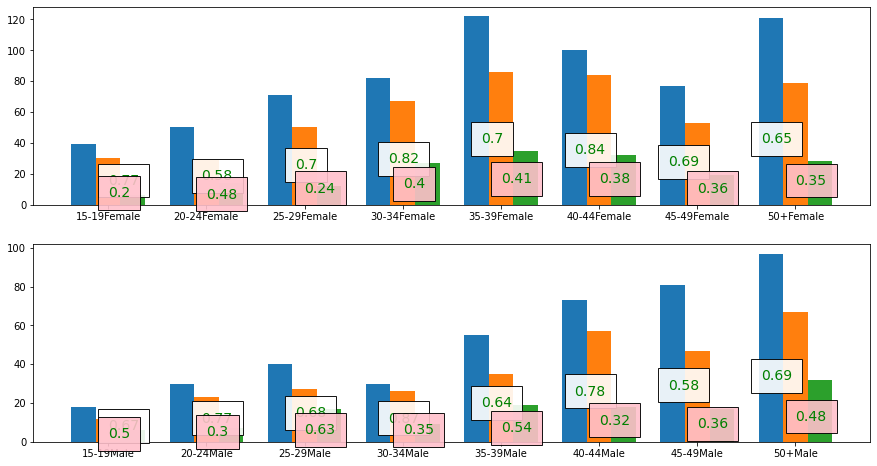

In [52]:
ageSexGraph(chitungwiza)

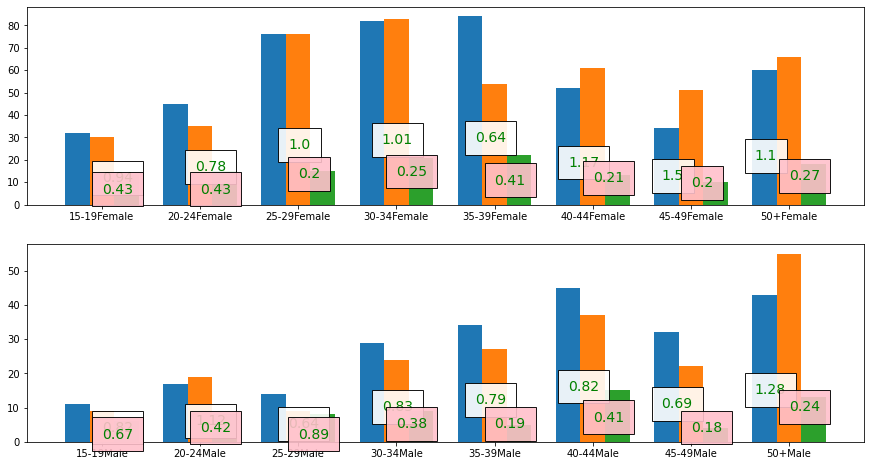

In [53]:
ageSexGraph(beitbridge)

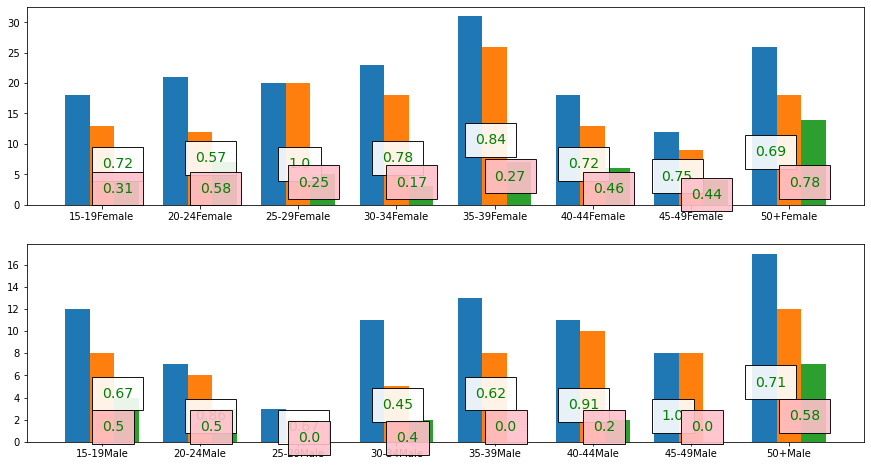

In [54]:
ageSexGraph(bulilima)

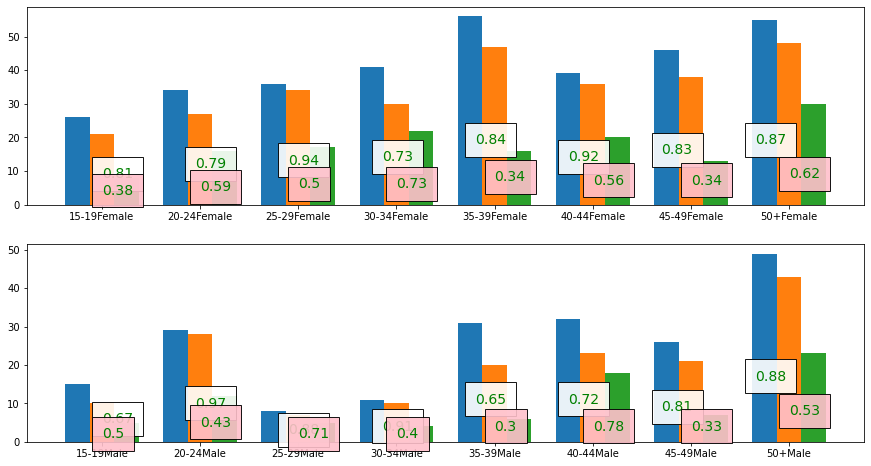

In [55]:
ageSexGraph(gwanda)

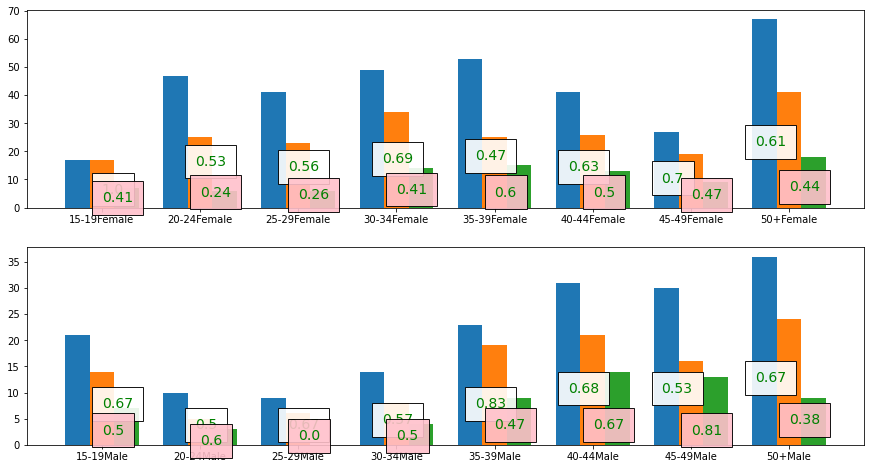

In [56]:
ageSexGraph(insiza)

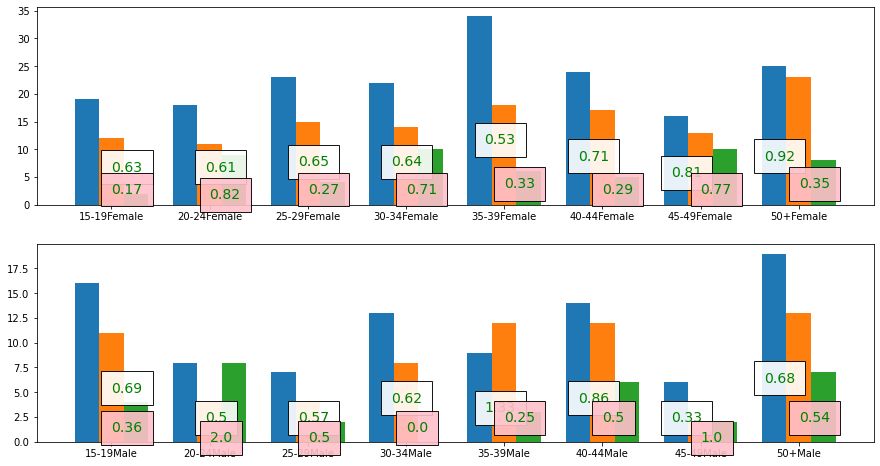

In [57]:
ageSexGraph(mangwe)

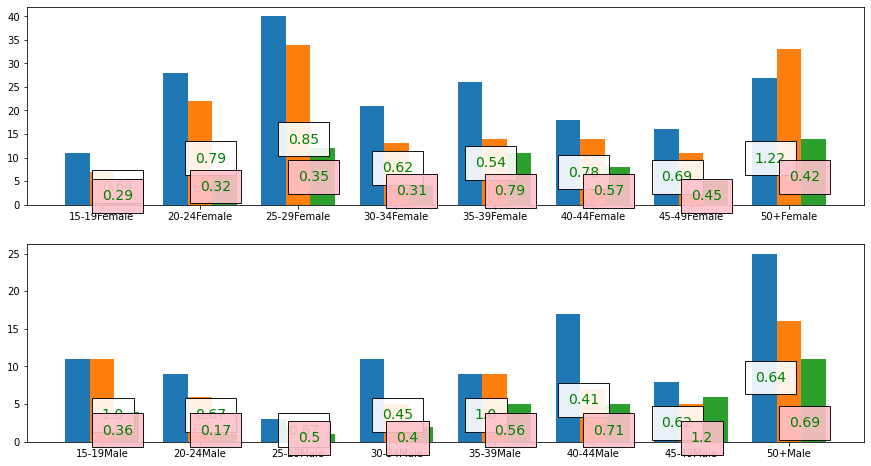

In [58]:
ageSexGraph(matobo)

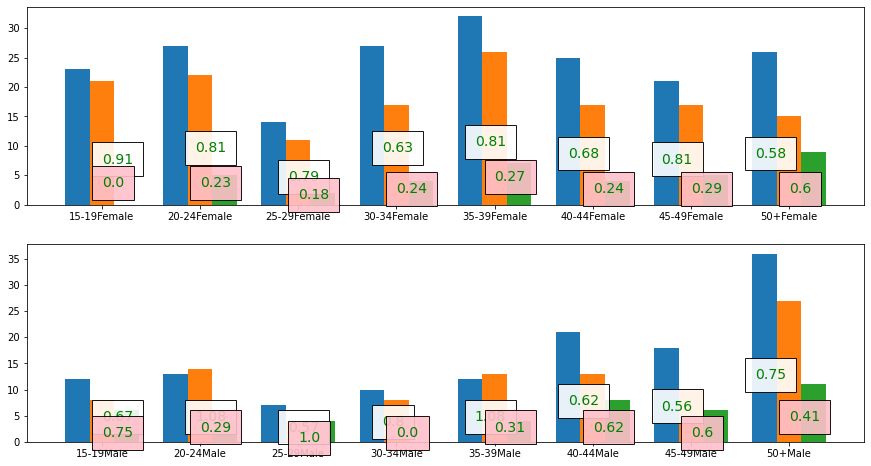

In [59]:
ageSexGraph(umzingwane)

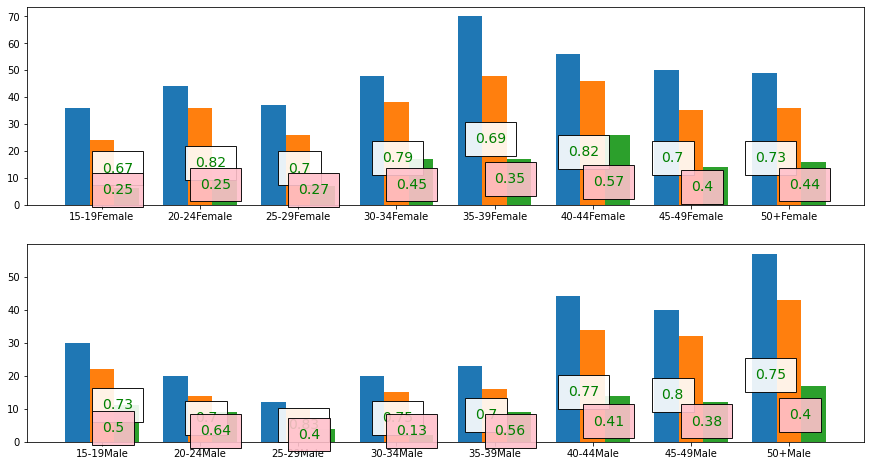

In [60]:
ageSexGraph(chiredzi)

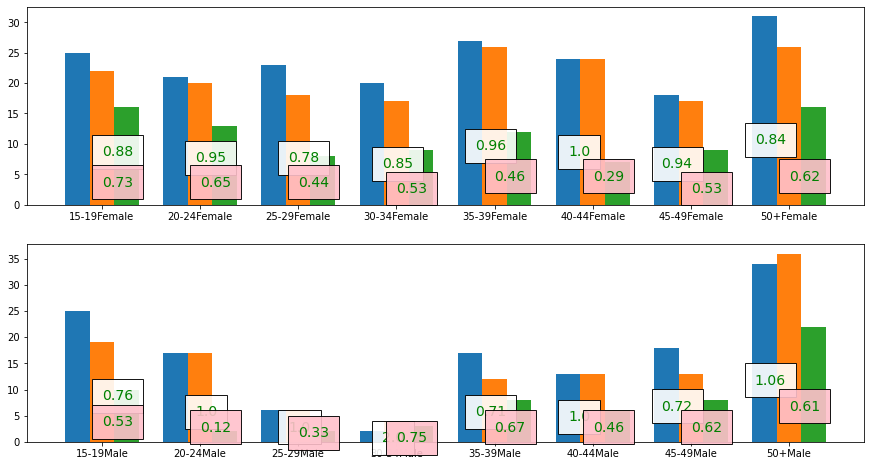

In [61]:
ageSexGraph(chivi)

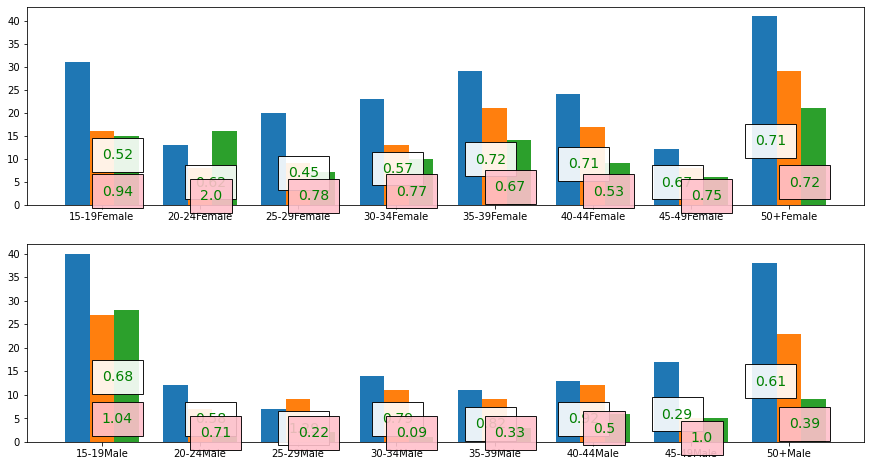

In [62]:
ageSexGraph(gutu)

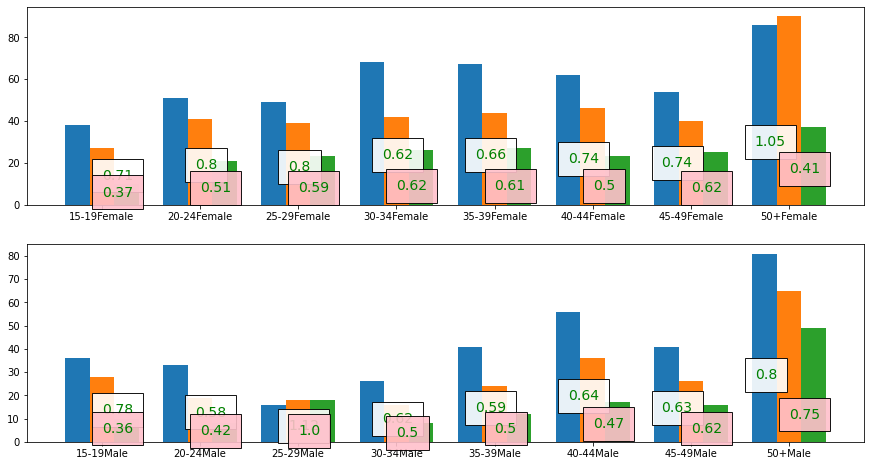

In [63]:
ageSexGraph(masvingo)

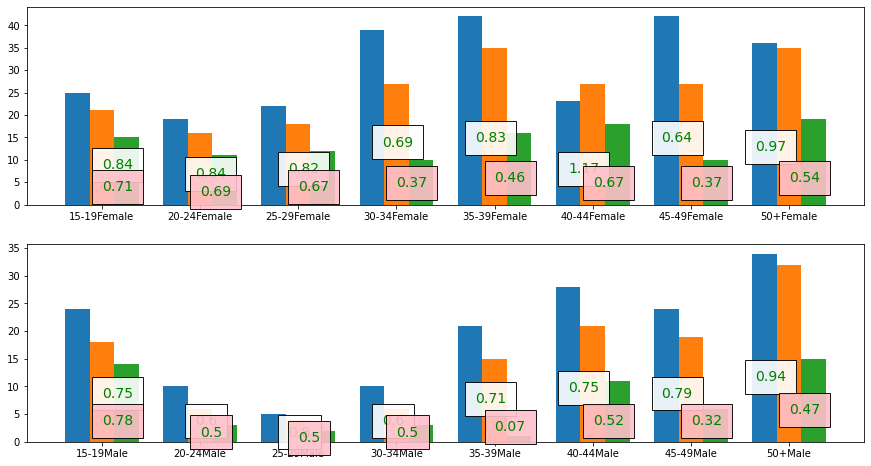

In [64]:
ageSexGraph(mwenezi)

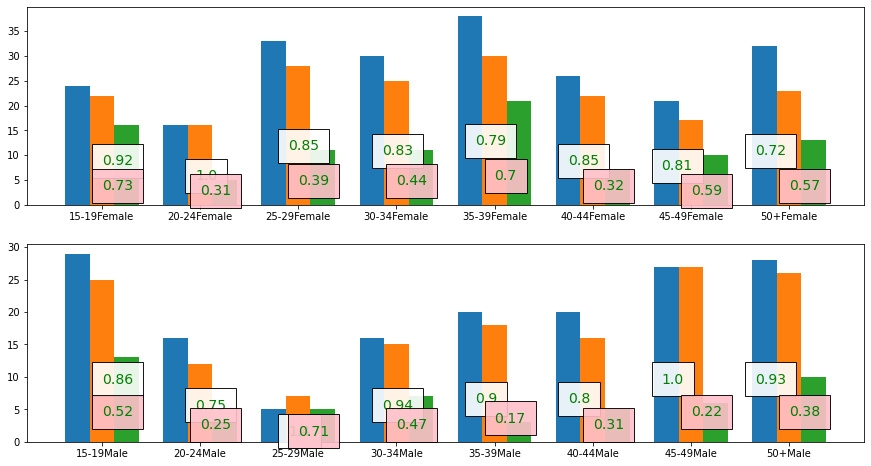

In [65]:
ageSexGraph(zaka)

In [73]:
rowTotals(males(highVL(df)))

1,orgunitlevel3,organisationunitname,HVL 15-19Male,HVL 20-24Male,HVL 25-29Male,HVL 30-34Male,HVL 35-39Male,HVL 40-44Male,HVL 45-49Male,HVL 50+Male,Total
2,Insiza,Amazon Clinic,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,Insiza,Avoca - 100029 - Rural Hospital,8.0,3.0,0.0,0.0,5.0,4.0,1.0,4.0,25.0
4,Mangwe,Bango - 100042 - Clinic,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
5,Matobo,Bazha - 100048 - Clinic,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
6,Beitbridge,Beitbridge - 100052 - District Hospital,4.0,6.0,5.0,13.0,16.0,21.0,19.0,17.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...
313,Masvingo,Zimuto BC-101885-Clinic,2.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,9.0
314,Gutu,Zinhata - 101809 - Clinic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
315,Chivi,Ziviku - 101812 - Clinic,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,7.0
316,Masvingo,Zvamahande - 101821 - Rural Health Centre,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
